<a href="https://colab.research.google.com/github/antonellagambarte/vision-por-computadoras-II/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import gdown
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random


In [17]:
url = "https://drive.google.com/uc?id=1QQKRENeBHR_Vj6az52N5sOx6ouSNKsuk"
output = "archivo.zip"

gdown.download(url, output, quiet=False, fuzzy=True)

destino = "datos_zip"
os.makedirs(destino, exist_ok=True)
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(destino)

print("Archivo extraído correctamente en :", destino)

Downloading...
From (original): https://drive.google.com/uc?id=1QQKRENeBHR_Vj6az52N5sOx6ouSNKsuk
From (redirected): https://drive.google.com/uc?id=1QQKRENeBHR_Vj6az52N5sOx6ouSNKsuk&confirm=t&uuid=3f2168cf-5e46-457e-b191-d75f6bcc8d03
To: /content/archivo.zip
100%|██████████| 2.19G/2.19G [00:32<00:00, 67.7MB/s]


Archivo extraído correctamente en : datos_zip


Analizando las carpetas del dataset, podemos ver que tienen 3 carpetas: color, grayscale segmeted.

En cada carpeta, están separadas las imagenes en carpetas cuyo nombre se componen de la siguiente manera:

planta__enfermedad/healthy, esto último según se trate de imagenes de plantas sanas o tienen una enfermedad en particular.

In [18]:
data_dir = "datos_zip/plantvillage dataset"

# Existen 3 carpetas en el dataset
tipos = ["color", "grayscale", "segmented"]

all_data = []

for tipo in tipos:
    tipo_dir = os.path.join(data_dir, tipo)
    for label in os.listdir(tipo_dir):
        folder = os.path.join(tipo_dir, label)
        if os.path.isdir(folder):
            for img_name in os.listdir(folder):
                img_path = os.path.join(folder, img_name)
                # Se guarda el tipo (color, segmented,grayscale), el label (ej. Apple_Apple_scab) y el path a la imagen
                all_data.append({"tipo": tipo, "label": label, "path": img_path})


In [19]:
df = pd.DataFrame(all_data)
print(f"Total de imágenes: {len(df)}")
print(f"Número de clases: {df['label'].nunique()}")


Total de imágenes: 162916
Número de clases: 38


Cada carpeta existen 38 clases.

In [20]:
df['tipo'].value_counts()

tipo
segmented    54306
color        54305
grayscale    54305
Name: count, dtype: int64

In [21]:
df_color = df[df['tipo'] == 'color']
df_gray = df[df['tipo'] == 'grayscale']
df_seg = df[df['tipo'] == 'segmented']

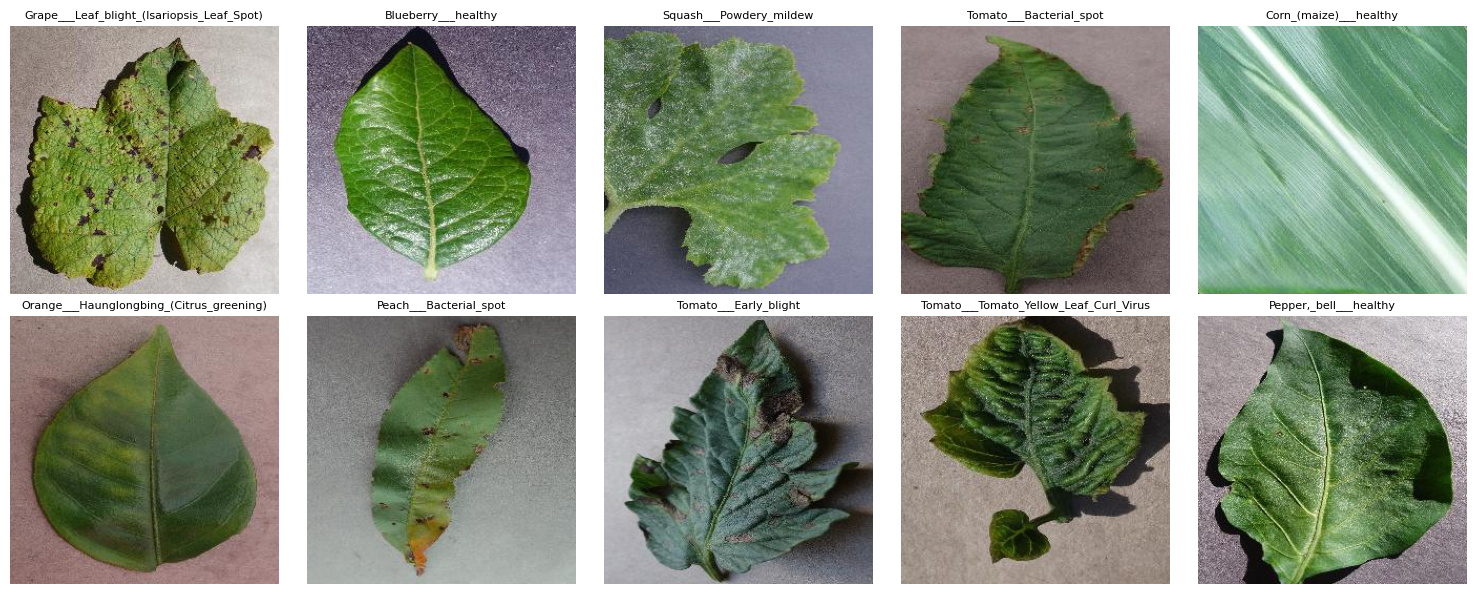

In [25]:
samples_color = df_color.sample(10, random_state=42)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for ax, (_, row) in zip(axes.flatten(), samples_color.iterrows()):
    img = Image.open(row['path'])
    ax.imshow(img)
    ax.set_title(row['label'], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

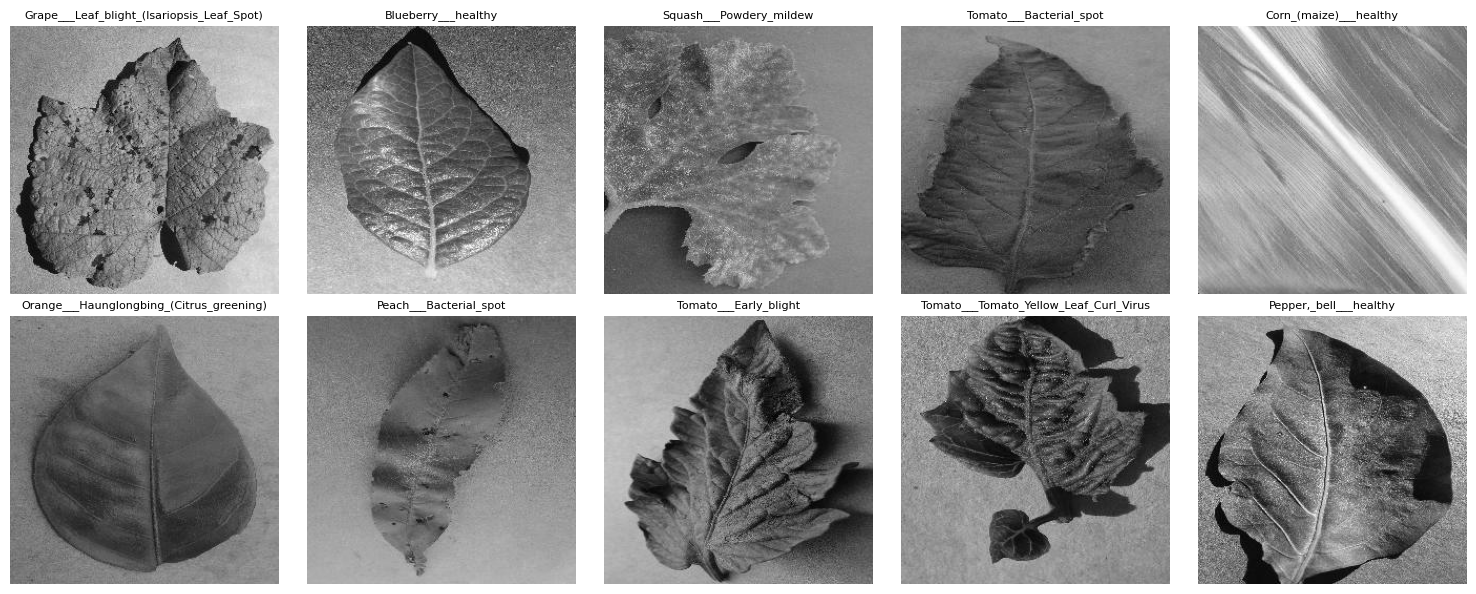

In [26]:
samples_gray = df_gray.sample(10, random_state=42)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for ax, (_, row) in zip(axes.flatten(), samples_gray.iterrows()):
    img = Image.open(row['path'])
    ax.imshow(img)
    ax.set_title(row['label'], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

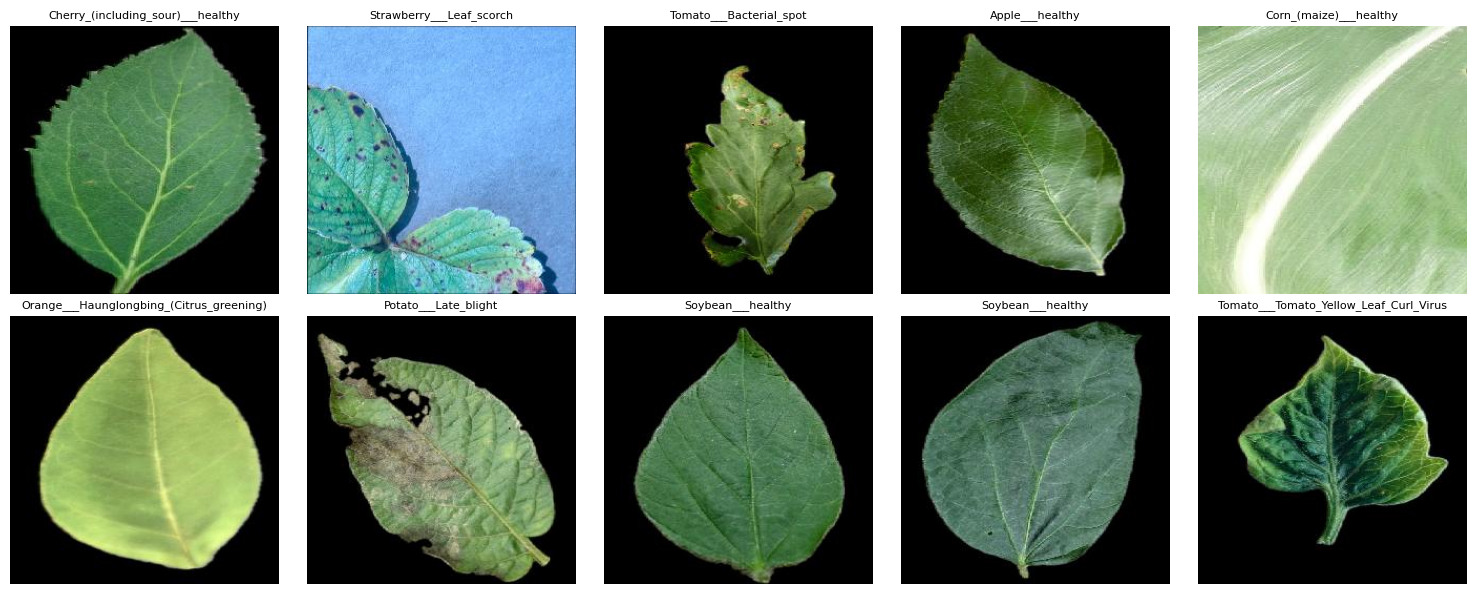

In [27]:
samples_seg = df_seg.sample(10, random_state=42)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for ax, (_, row) in zip(axes.flatten(), samples_seg.iterrows()):
    img = Image.open(row['path'])
    ax.imshow(img)
    ax.set_title(row['label'], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()